In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
train_file = '../Seqs_Jin-Standardized//summary.csv'
train = pd.read_csv(train_file)
# test_file = '../Seqs_BP/testFileList.csv'
# test = pd.read_csv(test_file)

### Split data into train and test

In [27]:
train.head()

,Filename,Singer,Raag,Subsequence Index,Start Time,End Time,Fraction of voiced frames
0,../Seqs_Jin-Standardized/Alap/AG_8_Kedar/AG_8_...,AG,Kedar,0,0.52,12.51,0.67
1,../Seqs_Jin-Standardized/Alap/AG_8_Kedar/AG_8_...,AG,Kedar,1,1.38,13.37,0.74
2,../Seqs_Jin-Standardized/Alap/AG_8_Kedar/AG_8_...,AG,Kedar,2,2.88,14.87,0.87
3,../Seqs_Jin-Standardized/Alap/AG_8_Kedar/AG_8_...,AG,Kedar,3,4.30,16.29,0.87
4,../Seqs_Jin-Standardized/Alap/AG_8_Kedar/AG_8_...,AG,Kedar,4,5.67,17.66,0.87


In [28]:
train.groupby('Singer').count()

,Filename,Raag,Subsequence Index,Start Time,End Time,Fraction of voiced frames
Singer,,,,,,
AG,1847,1847,1847,1847,1847,1847
CC,2457,2457,2457,2457,2457,2457
SCh,2258,2258,2258,2258,2258,2258


In [29]:
seqs = train.loc[train.Filename.str.contains('Alap')].shape[0]
files = len(train.loc[train.Filename.str.contains('Alap'), 'Filename'].unique())
print('Train set - Seqs: ' + str(seqs) + ' files: ' + str(files))

Train set - Seqs: 6133 files: 55


In [30]:
seqs = train.loc[~train.Filename.str.contains('Alap')].shape[0]
files = len(train.loc[~train.Filename.str.contains('Alap'), 'Filename'].unique())
print('Train set - Seqs: ' + str(seqs) + ' files: ' + str(files))

Train set - Seqs: 429 files: 31


In [31]:
sub = train.loc[~train.Filename.str.contains('Alap')]

In [32]:
sub.groupby(['Singer', 'Raag', 'Filename']).count()

Subsequence Index  \
Singer Raag  Filename                                                                
AG     Bag   ../Seqs_Jin-Standardized/Pakad/AG_P7_Bag/AG_P7_...                  3   
       Bilas ../Seqs_Jin-Standardized/Pakad/AG_P9_Bilas/AG_P...                  6   
       Jaun  ../Seqs_Jin-Standardized/Pakad/AG_P2_Jaun/AG_P2...                  2   
       Kedar ../Seqs_Jin-Standardized/Pakad/AG_P3_Kedar/AG_P...                  1   
       MM    ../Seqs_Jin-Standardized/Pakad/AG_P1_MM/AG_P1_M...                  2   
       Marwa ../Seqs_Jin-Standardized/Pakad/AG_P8_Marwa/AG_P...                  1   
CC     Bag   ../Seqs_Jin-Standardized/Pakad/CC_P8_Bag/CC_P8_...                 53   
       Bahar ../Seqs_Jin-Standardized/Pakad/CC_P9_Bahar/CC_P...                 26   
       Bilas ../Seqs_Jin-Standardized/Pakad/CC_P1a_Bilas/CC_...                 12   
             ../Seqs_Jin-Standardized/Pakad/CC_P1b_Bilas/CC_...                 24   
       Jaun  ../Seqs_Jin-Standardized/Pakad/CC_P2_Jaun/CC_P2...                 37   
       Kedar ../Seqs_Jin-Standardized/Pakad/CC_P6_Kedar/CC_P...                 25   
       MM    ../Seqs_Jin-Standardized/Pakad/CC_P3_MM/CC_P3_M...                 40   
       Marwa ../Seqs_Jin-Standardized/Pakad/CC_P7_Marwa/CC_P...                 45   
       Nand  ../Seqs_Jin-Standardized/Pakad/CC_P4_Nand/CC_P4...                 32   
       Shree ../Seqs_Jin-Standardized/Pakad/CC_P5_Shree/CC_P...                 41   
SCh    Bag   ../Seqs_Jin-Standardized/Pakad/SCh_P8a_Bag/SCh_...                  4   
       Bahar ../Seqs_Jin-Standardized/Pakad/SCh_P9a_Bahar/SC...                  8   
       Bilas ../Seqs_Jin-Standardized/Pakad/SCh_P1a_Bilas/SC...                  9   
             ../Seqs_Jin-Standardized/Pakad/SCh_P1b_Bilas/SC...                  2   
       Jaun  ../Seqs_Jin-Standardized/Pakad/SCh_P2a_Jaun/SCh...                  6   
             ../Seqs_Jin-Standardized/Pakad/SCh_P2b_Jaun/SCh...                  2   
       Kedar ../Seqs_Jin-Standardized/Pakad/SCh_P6a_Kedar/SC...                  6   
             ../Seqs_Jin-Standardized/Pakad/SCh_P6b_Kedar/SC...                  2   
       MM    ../Seqs_Jin-Standardized/Pakad/SCh_P3a_MM/SCh_P...                  9   
             ../Seqs_Jin-Standardized/Pakad/SCh_P3b_MM/SCh_P...                  4   
       Marwa ../Seqs_Jin-Standardized/Pakad/SCh_P7a_Marwa/SC...                  5   
             ../Seqs_Jin-Standardized/Pakad/SCh_P7b_Marwa/SC...                  4   
       Nand  ../Seqs_Jin-Standardized/Pakad/SCh_P4a_Nand/SCh...                  8   
       Shree ../Seqs_Jin-Standardized/Pakad/SCh_P5a_Shree/SC...                  4   
             ../Seqs_Jin-Standardized/Pakad/SCh_P5b_Shree/SC...                  6   

                                                                 Start Time  \
Singer Raag  Filename                                                         
AG     Bag   ../Seqs_Jin-Standardized/Pakad/AG_P7_Bag/AG_P7_...           3   
       Bilas ../Seqs_Jin-Standardized/Pakad/AG_P9_Bilas/AG_P...           6   
       Jaun  ../Seqs_Jin-Standardized/Pakad/AG_P2_Jaun/AG_P2...           2   
       Kedar ../Seqs_Jin-Standardized/Pakad/AG_P3_Kedar/AG_P...           1   
       MM    ../Seqs_Jin-Standardized/Pakad/AG_P1_MM/AG_P1_M...           2   
       Marwa ../Seqs_Jin-Standardized/Pakad/AG_P8_Marwa/AG_P...           1   
CC     Bag   ../Seqs_Jin-Standardized/Pakad/CC_P8_Bag/CC_P8_...          53   
       Bahar ../Seqs_Jin-Standardized/Pakad/CC_P9_Bahar/CC_P...          26   
       Bilas ../Seqs_Jin-Standardized/Pakad/CC_P1a_Bilas/CC_...          12   
             ../Seqs_Jin-Standardized/Pakad/CC_P1b_Bilas/CC_...          24   
       Jaun  ../Seqs_Jin-Standardized/Pakad/CC_P2_Jaun/CC_P2...          37   
       Kedar ../Seqs_Jin-Standardized/Pakad/CC_P6_Kedar/CC_P...          25   
       MM    ../Seqs_Jin-Standardized/Pakad/CC_P3_MM/CC_P3_M...          40   
       Marwa ../Seqs_Jin-Standardized/Pak

#### View Raag wise stats

Train

Number of sequences per raag

In [33]:
train.groupby(by='Raag').count()['Filename'].sum()

6562

Avg voiced percentage per raag

In [34]:
train.groupby(by='Raag').mean()['Fraction of voiced frames']

Raag
Bag      0.743764
Bahar    0.826814
Bilas    0.750342
Jaun     0.771074
Kedar    0.723103
MM       0.708698
Marwa    0.737189
Nand     0.763901
Shree    0.719408
Name: Fraction of voiced frames, dtype: float64

In [8]:
test.groupby(by='Raag').mean()['Fraction of voiced frames']

Raag
Bag      0.688235
Bahar    0.536667
Bilas    0.619333
Jaun     0.684375
Kedar    0.588182
MM       0.716154
Marwa    0.682500
Nand     0.648571
Shree    0.625833
Name: Fraction of voiced frames, dtype: float64

Voiced Percentage in Pakad

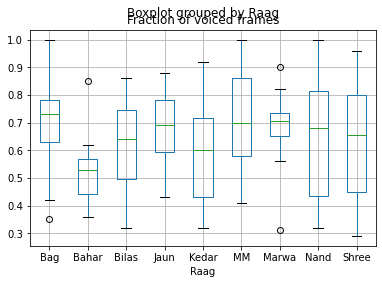

In [9]:
pd.plotting.boxplot(test, column='Fraction of voiced frames', by='Raag')
plt.show()

In [9]:
test.loc[test['Fraction of voiced frames'] < 0.5].shape[0]

34